# Yêu cầu của bài toán phân loại (classification)

**Tên bài toán**: *Rain in Australia (Mưa ở nước Úc)*

**Nguồn**: ["Rain in Australia" trên Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

**Mô tả bài toán**: Huấn luyện mô hình phân loại (classification model) để từ dữ liệu cho sẵn, hãy dự đoán xem ngày mai có mưa tại nước Úc hay không?


**Mô tả Dataset**: Tệp dữ liệu weatherAUS.csv có chứa dữ liệu quan trắc thời tiết trong khoảng 10 năm từ nhiều địa điểm trên khắp nước Úc. Cột RainTomorrow của tệp dữ liệu, tức ngày mai có mưa hay không, là mục tiêu mà mô hình cần dự đoán được kết quả. Cột RainTomorrow có 2 class là Yes hoặc No. Theo quan sát, RainTomorrow sẽ là Yes nếu ngày mai đó có nhiều hơn 1mm nước mưa.

**Ta có 23 cột thuộc tính với các ý nghĩa như sau:**

0-Date: Ngày thực hiện quan sát; 1-Location: Tên của địa điểm đặt trạm khí tượng; 2-MinTemp: Nhiệt độ thấp nhất trong ngày (tính bằng độ c); 3-MaxTemp: Nhiệt độ cao nhất trong ngày (tính bằng độ c); 4-Rainfall: Lượng mưa đo được trong ngày (tính bằng mm); 5-Evaporation: Độ bóc hơi (tính bằng mm); 6-Sunshine: Số giờ nắng sáng trong ngày; 7-WindGustDir: Hướng gió giật mạnh nhất trong ngày; 8-WindGustSpeed: Tốc độ của gió giật mạnh nhất (tính bằng km/giờ); 9-WindDir9am: Hướng gió lúc 9 giờ sáng;

10-WindDir3pm: Hướng gió lúc 3 giờ chiều; 11-WindSpeed9am: Tốc độ của gió lúc 9 giờ sáng; 12-WindSpeed3pm: Tốc độ của gió lúc 3 giờ chiều; 13-Humidity9am: Độ ẩm lúc 9 giờ sáng (tính bằng %); 14-Humidity3pm: Độ ẩm lúc 3 giờ chiều (tính bằng %); 15-Pressure9am: Áp suất khí quyển lúc 9 giờ sáng; 16-Pressure3pm: Áp suất khí quyển lúc 3 giờ chiều; 17-Cloud9am: Độ phủ mây lúc 9 giờ sáng; 18-Cloud3pm: Độ phủ mây lúc 3 giờ chiều; 19-Temp9am: Nhiệt độ lúc 9 giờ sáng; 

20-Temp3pm: Nhiệt độ lúc 3 giờ chiều; 21-RainToday: Ngày hôm nay có mưa không (Yes hoặc No); 22-RainTomorrow: Ngày mai có mưa không.

# 1.1 Lấy dữ liệu cách 1 (Không dùng Google Drive thì bỏ qua)

In [1]:
# Kết nối Google Colab đến Google Drive của bạn (Nếu có dùng đến Google Drive):
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# Trong bài này, dữ liệu Input cho xử lý (tệp 'weatherAUS.csv') nằm ở thư mục "../libPy" trên Google Drive.
from subprocess import check_output # Hàm check_output sẽ giúp chạy lệnh liệt kê xem danh sách tất cả các file có trong dường dẫn thư mục.
print(check_output(['ls', '/content/gdrive/MyDrive/libPy/']).decode("utf8")) # Hiển thị danh sách tất cả các file có trong thư mục libPy.

51800929_homework1
adult.csv
Dataset
fake.csv
HAG.csv
input1.txt
Lib for Stack & Queue.py
Prime.py
__pycache__
vietnamese-stopwords.txt
weatherAUS.csv
XLAS
youtube_comment_dataset.csv



In [3]:
# Kiểm tra xem đã có file dữ liệu hay chưa:
import os
import numpy as np # Thư viện cho Đại số tuyến tính (Linear Algebra)
import pandas as pd # Hỗ trợ xử lý/thao tác dữ liệu, điển hình là đọc và xuất file dạng CSV
import matplotlib.pyplot as plt
import seaborn as sns

# Cách 1:
# path = '/content/gdrive/MyDrive/libPy/' # Đường dẫn đến file dữ liệu dataset trong Google Drive
# filename = str(input("Nhập tên file: ")) # Ví dụ: weatherAUS
# full_path = path + filename + ".csv"

# Cách 2:
full_path = '/content/gdrive/MyDrive/libPy/weatherAUS.csv'

# Đọc dữ liệu rồi In ra màn hình một phần dữ liệu đó
if(os.path.exists(full_path) and os.path.isfile(full_path)):
  dtset = pd.read_csv(full_path) # Đọc file .csv với đường dẫn cho sẵn
  dtset.info() # Xem thông tin tổng quan của dataset
  print("---")
  print(dtset.head(4)) # In 4 hàng đầu tiên của Dataset
else:
  print("NO Dataset found!") # Báo lỗi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# 1.2 Lấy dữ liệu cách 2 (Local, nằm chung thư mục với source code)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lấy dữ liệu từ file csv, lưu dưới dạng dataframe
full_path = 'weatherAUS.csv' # Đổi đường dẫn lại cho phù hợp
dtset = pd.read_csv(full_path)
print(dtset.shape) # (số Dòng, số Cột)
print(dtset.columns) # Tên các cột thuộc tính

(145460, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [3]:
dtset.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No


In [4]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Quan sát từ trên thì chúng ta có thể thấy rằng Dataset này có chứa hỗn tạp các biến dạng category (kiểu object) and numeric (kiểu float64). Ngoài ra, một số ô còn bị missing data (NaN).

In [5]:
# Kiểm tra xem có dữ liệu nào bị trùng lập không
dtset[dtset.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


Không thấy có mẫu dữ liệu nào bị trùng.

# 2. Xử lý các dòng bị missing data của RainTommorow

In [6]:
dtset['RainTomorrow'].isnull().tail(5)

145455    False
145456    False
145457    False
145458    False
145459     True
Name: RainTomorrow, dtype: bool

Như một điều tất yếu, nếu có dòng dữ liệu nào mà có giá trị cần dự đoán (RainTomorrow) là không rõ (NaN) thì chúng ta cần phải loại bỏ chúng đi.

In [7]:
print("Độ dài của Dataset gốc:", len(dtset))
print(dtset.RainTomorrow.value_counts(dropna=False)) # Hiện các class có trong RainTomorrow, số lần chúng xuất hiện, xếp theo thứ tự từ trên xuống
dtset = dtset[~dtset['RainTomorrow'].isnull()] # Hàm isnull() sẽ trả về False nếu giá trị tại ô đó khác NaN, True nếu là NaN. Thêm dấu "~" giúp đảm bảo chỉ những ô có giá trị khác NaN (tức False) mới được giữ lại.
print("Độ dài của Dataset sau khi loại bỏ các giá trị không rõ ở cột RainTomorrow:", len(dtset))

Độ dài của Dataset gốc: 145460
No     110316
Yes     31877
NaN      3267
Name: RainTomorrow, dtype: int64
Độ dài của Dataset sau khi loại bỏ các giá trị không rõ ở cột RainTomorrow: 142193


# 3. Xử lý dữ liệu cột Date

In [8]:
# Các cột nào có dạng Category?
def categoryOnly(dataset):
  category = dataset.select_dtypes(include=['object'])
  return category

# Các cột nào có dạng Numeric?
def numericOnly(dataset):
  numeric = dataset.select_dtypes(include=['float64', 'int'])
  return numeric

ca = categoryOnly(dtset)
ca.head(4)

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No


Có 7 cột có dạng Category: Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow. Trong đó, có 2 cột là Binary: RainToday và RainTomorrow. Với RainTomorrow là giá trị cần được đưa ra dự đoán.

In [9]:
def LabelsCount_print(CategoryOrNumeric, dataset):
  for x in CategoryOrNumeric:
    print('Cột', x, 'chứa', dataset[x].nunique(), 'nhãn')

LabelsCount_print(categoryOnly(dtset), dtset)

Cột Date chứa 3436 nhãn
Cột Location chứa 49 nhãn
Cột WindGustDir chứa 16 nhãn
Cột WindDir9am chứa 16 nhãn
Cột WindDir3pm chứa 16 nhãn
Cột RainToday chứa 2 nhãn
Cột RainTomorrow chứa 2 nhãn


Nhận thấy rằng cột Date có quá nhiều nhãn, dẫn tới việc học của mô hình trở nên kém hiệu quả. Vì vậy, trước tiên chúng ta cần phải tiền xử lý dữ liệu lên chúng.

In [10]:
# Chuyển dữ liệu cột Date từ object sang kiểu dữ liệu Datetime
dtset['Date'] = pd.to_datetime(dtset['Date'])
LabelsCount_print(categoryOnly(dtset), dtset)

Cột Location chứa 49 nhãn
Cột WindGustDir chứa 16 nhãn
Cột WindDir9am chứa 16 nhãn
Cột WindDir3pm chứa 16 nhãn
Cột RainToday chứa 2 nhãn
Cột RainTomorrow chứa 2 nhãn


In [11]:
# Tách cột thuộc tính Date ra thành 3 cột riêng lẻ, các cột này sẽ có kiểu int64
dtset['Year'] = dtset['Date'].dt.year
dtset['Month'] = dtset['Date'].dt.month
dtset['Day'] = dtset['Date'].dt.day
dtset.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4


# 4. Một số minh họa dựa trên dữ liệu cho sẵn

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
numericOnly(dtset).columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')

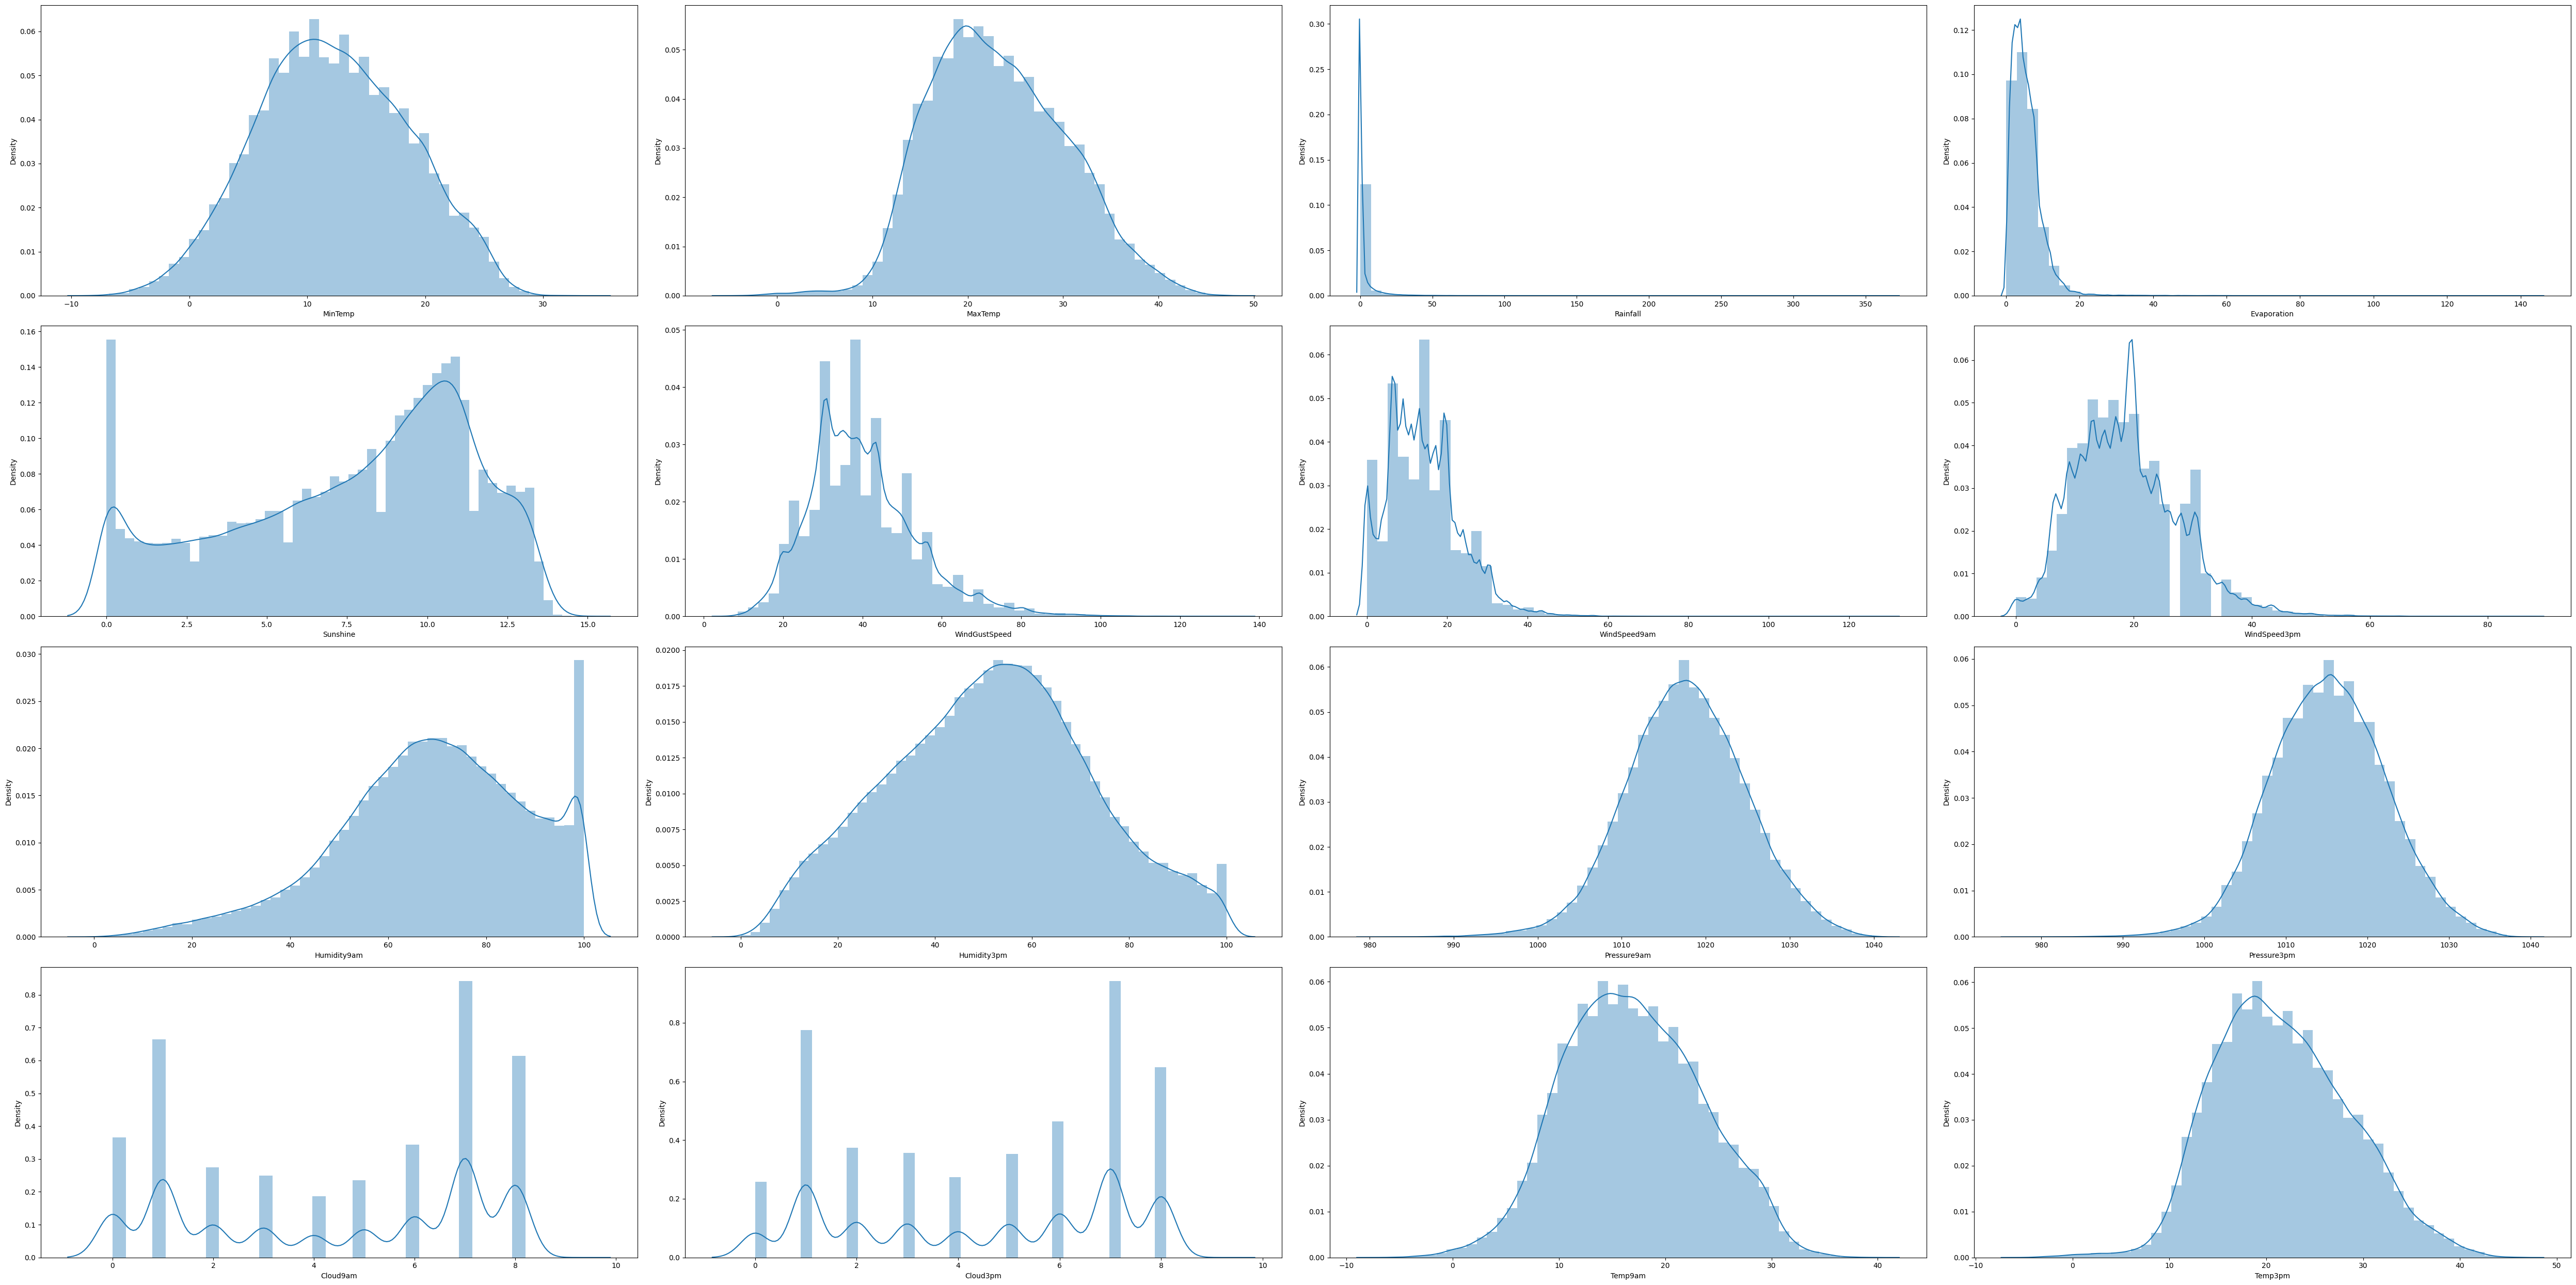

In [14]:
# Tổng quát (các cột có dạng numeric):
fig = plt.figure(figsize=(50, 25))
cn = 1  # Bộ đếm vị trí hình

for x in dtset:
  if(dtset[x].dtype == 'float64'): # Để loại bỏ các cột Ngày, Tháng, Năm ra khỏi hình sắp vẽ
    # Tại vì chỉ còn có 16 cái nên chia (4, 4, cn)
    plt.subplot(4, 4, cn) # (Số lượng hàng, Số lượng cột, Thứ tự)
    sns.distplot(dtset[x])
    cn = cn + 1
  else:
    continue

plt.tight_layout()
plt.savefig('MuaOUc.png')
plt.show()

Nhìn hình tổng quát thì chúng ta có thể thấy các cột thuộc tính như Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm khả năng cao đang chứa nhiều outlier.

In [15]:
DtsetFor_datePlot = dtset.iloc[-950:, :] # từ 2015 đến 2017

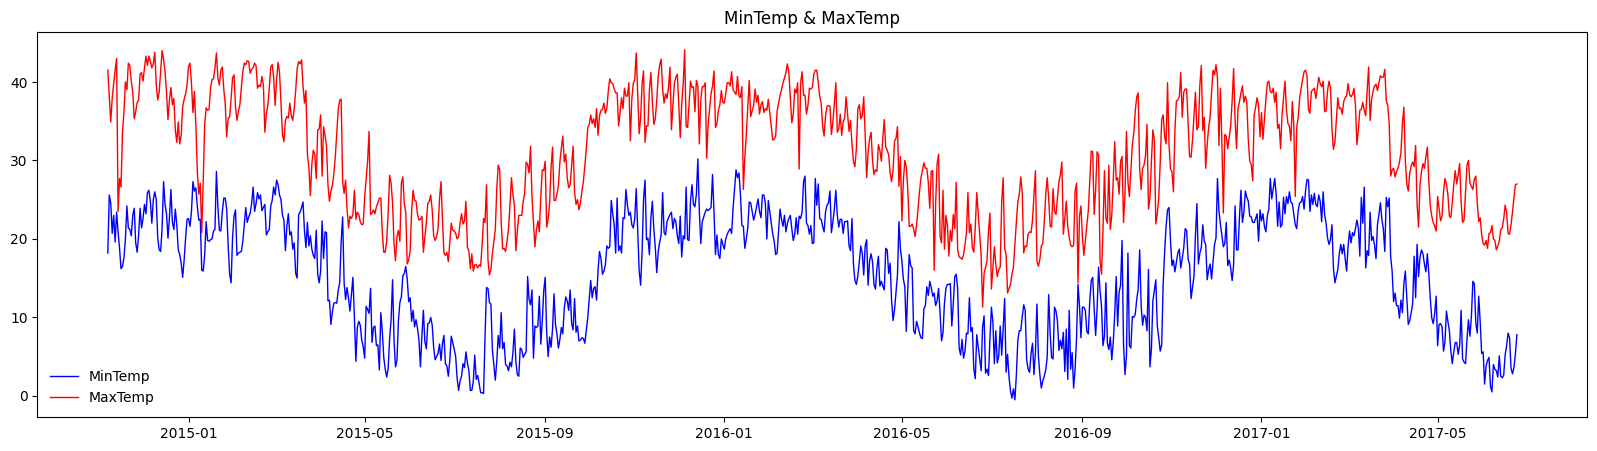

In [16]:
# MinTemp và MaxTemp từ 2015 đến 2017:
plt.figure(figsize=[20, 5])
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['MinTemp'], color='blue', linewidth=1, label='MinTemp')
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['MaxTemp'], color='red', linewidth=1, label='MaxTemp')
plt.title('MinTemp & MaxTemp')
plt.legend(loc='lower left', frameon=False)
plt.show()

Từ hình giữa MinTemp và MaxTemp, chúng ta thấy rằng giữa chúng có mối quan hệ tương quan thuận. Bên cạnh đó, cũng bởi thời tiết ở Úc khác Việt Nam, nên các biểu đồ như biểu đồ nhiệt độ cũng có sự thay đổi tương ứng. Ở Úc, từ tháng 12 đến tháng 2 là mùa hè, nên nhiệt độ cao. Từ tháng 6 đến tháng 8 là mùa đông, nên nhiệt độ thấp.

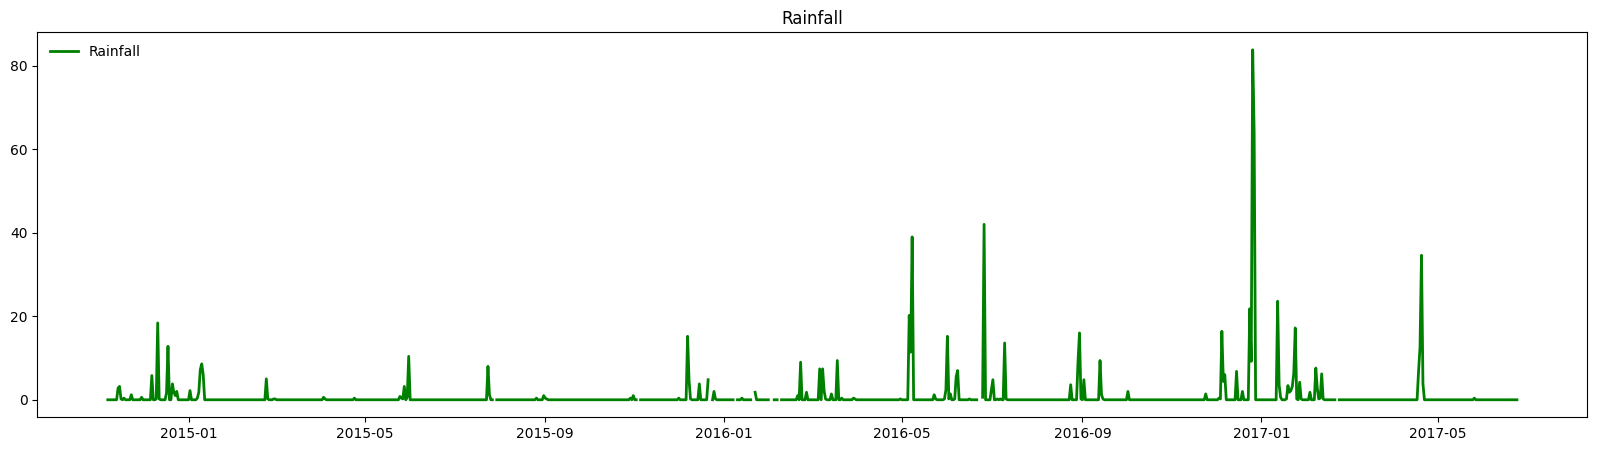

In [17]:
# Rainfall từ 2015 đến 2017:
plt.figure(figsize=[20,5])
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['Rainfall'], color='green', linewidth=2, label='Rainfall')
plt.title('Rainfall')
plt.legend(loc='upper left', frameon=False)
plt.show()

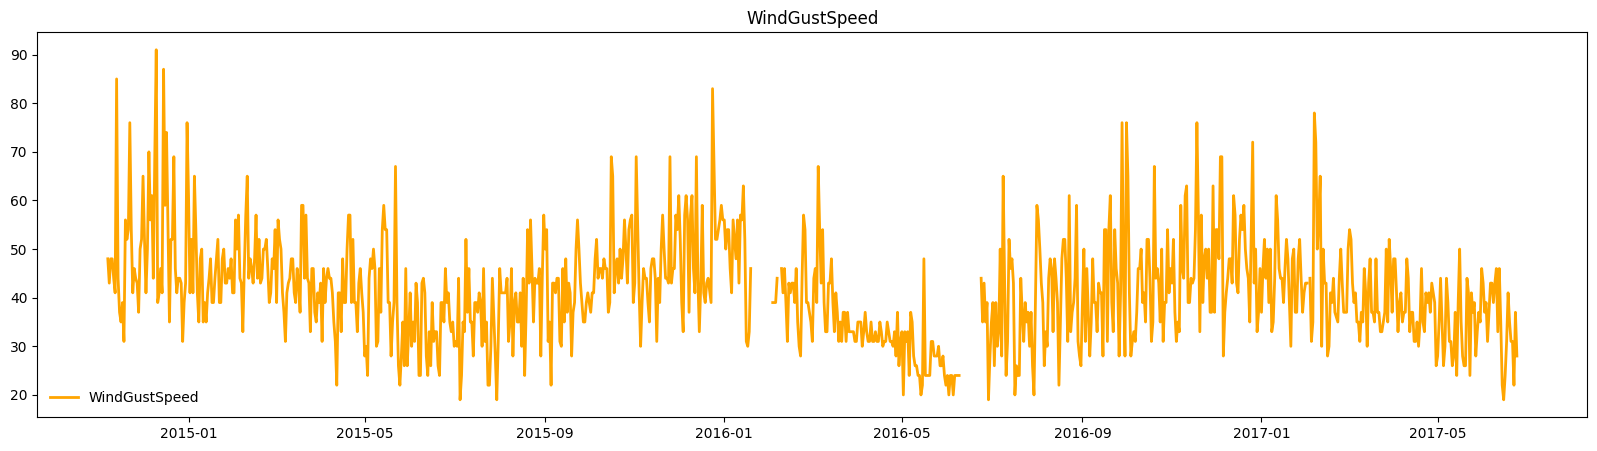

In [18]:
# WindGustSpeed từ 2015 đến 2017:
plt.figure(figsize=[20,5])
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['WindGustSpeed'], color='orange', linewidth=2, label='WindGustSpeed')
plt.title('WindGustSpeed')
plt.legend(loc='lower left', frameon=False)
plt.show()

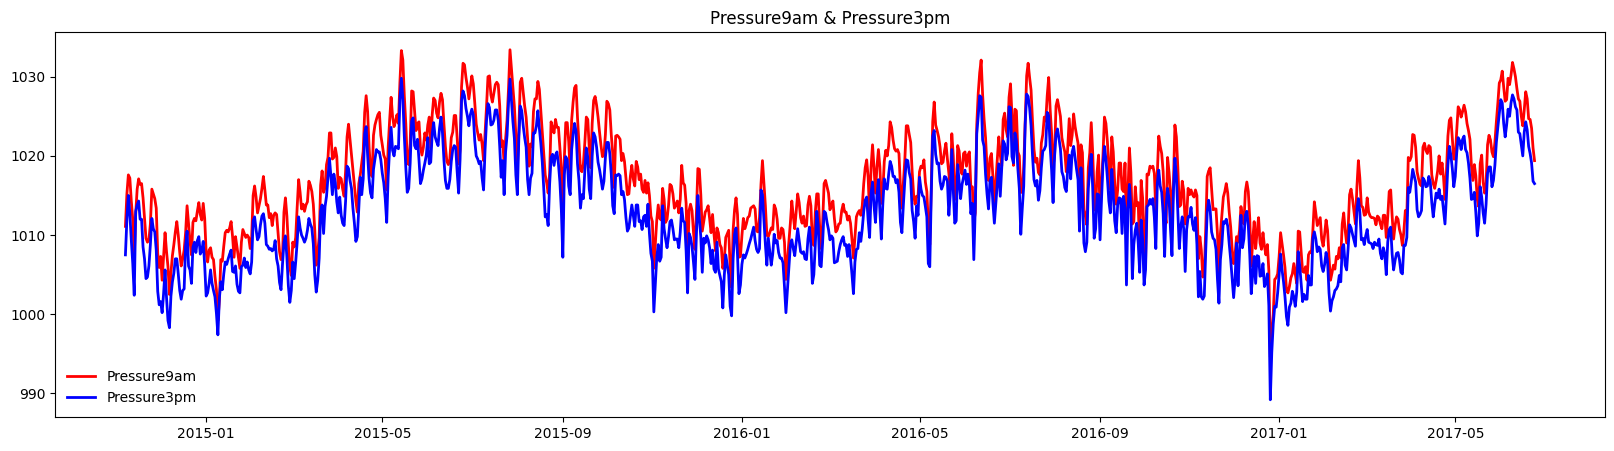

In [19]:
# Pressure9am và Pressure3am từ 2015 đến 2017:
plt.figure(figsize=[20,5])
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['Pressure9am'], color='red', linewidth=2, label='Pressure9am')
plt.plot(DtsetFor_datePlot['Date'], DtsetFor_datePlot['Pressure3pm'], color='blue', linewidth=2, label='Pressure3pm')
plt.legend(loc='lower left', frameon=False)
plt.title('Pressure9am & Pressure3pm')
plt.show()

In [20]:
# Do tới bước này thì không cần dùng tới cột Date nữa (đã có 3 cột mới Ngày, Tháng, Năm tương ứng thay thế thêm vào Dataset)
dtset.drop('Date', inplace= True, axis=1) # Nên ta xóa nó đi
dtset.head(4)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4


# 5. Phân tích Correlation giữa các cột thuộc tính

In [21]:
# Tính toán correlation theo cặp của các cột:
correlation = dtset.corr() # Nhận về một ma trận correlation có kiểu dữ liệu dạng DataFrame

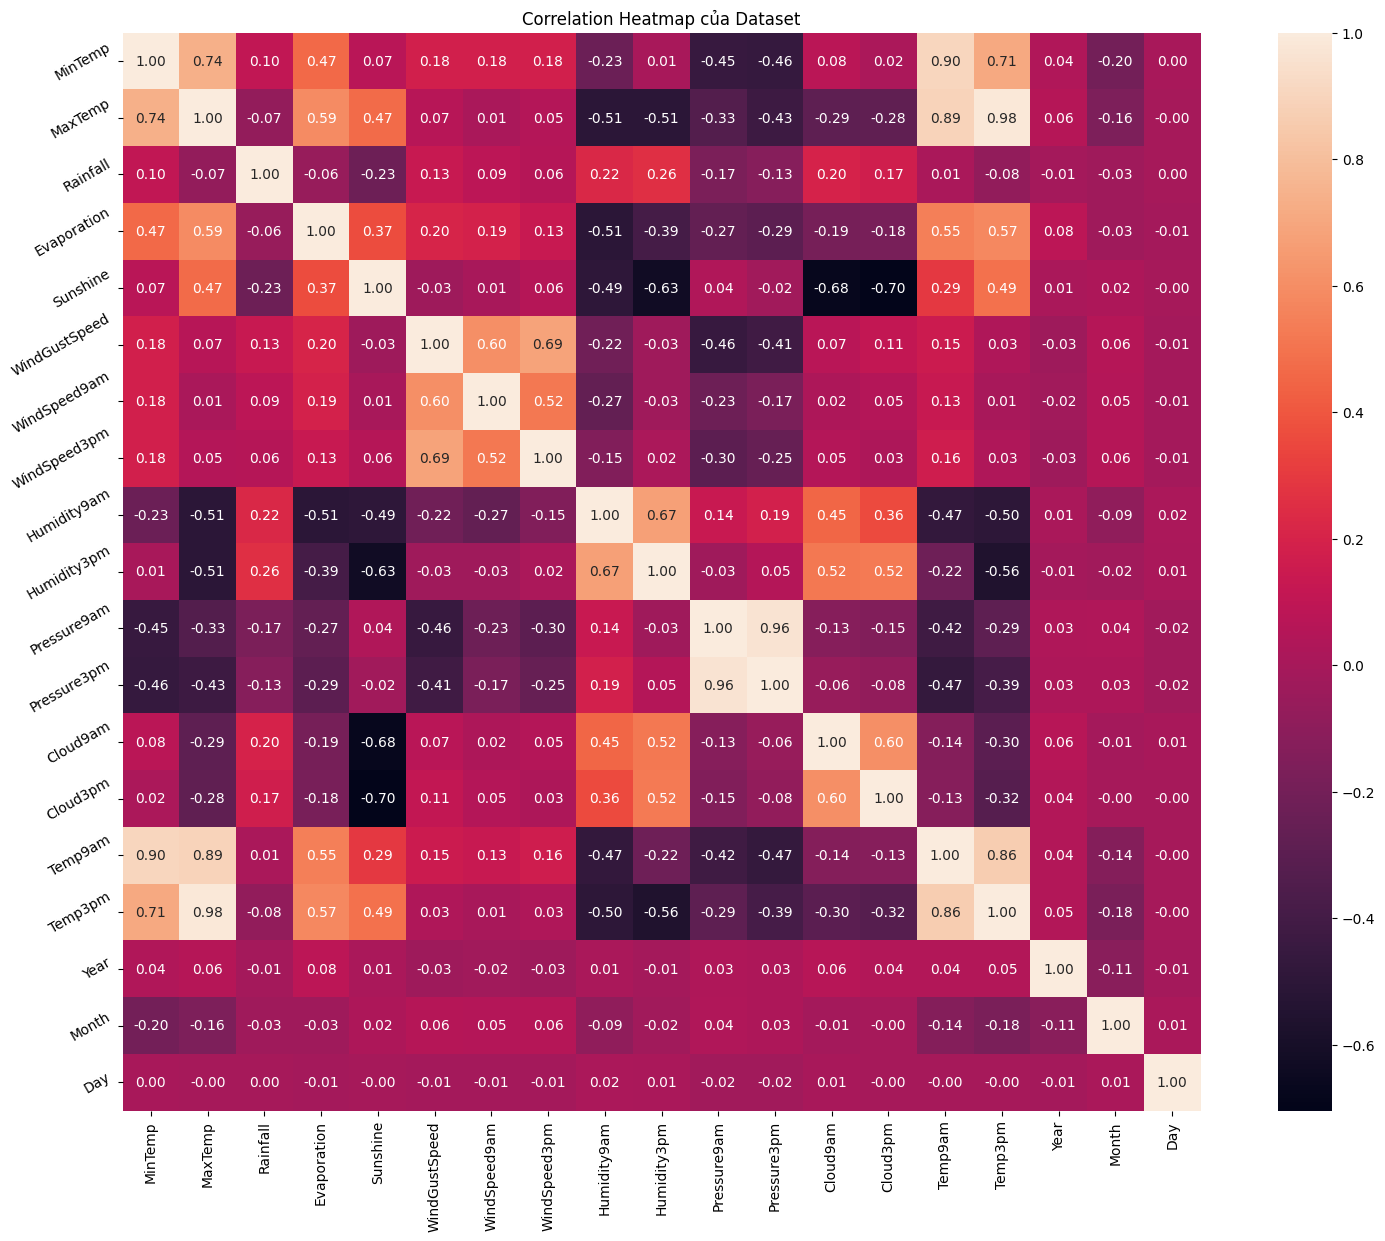

In [22]:
# Vẽ correlation bằng Heatmap
plt.figure(figsize = (20, 14))
plt.title('Correlation Heatmap của Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

Màu càng nhạt thì độ Correlated giữa chúng càng cao. Vì vậy, từ Heatmap trên, chúng ta có thể thấy rằng:

1. MinTemp và MaxTemp khá correlated (0.74). MinTemp và Temp3pm cũng khá correlated (0.71). Riêng MinTemp và Temp9am thì cực kỳ correlated (0.90).

2. MaxTemp và Temp3pm, cũng như MaxTemp và Temp9am cực kỳ correlated (0.98 và 0.89).

3. WindGustSpeed và WindSpeed3pm chỉ hơi correlated (0.69).

4. Pressure9am và Pressure3pm cực kỳ correlated (0.96).

5. Temp9am và Temp3pm cực kỳ correlated (0.86)

In [23]:
# Xóa một thuộc tính trong những cặp có correlated trên 0.9 thì chúng ta có:
dtset.drop(['Temp9am','Temp3pm','Pressure3pm'], inplace= True, axis=1)
dtset.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day'],
      dtype='object')

# 6. Xử lý missing data trong Dataset

In [24]:
# Tạo biến list lưu các cột dạng Category
categorical = [col for col in dtset.columns if dtset[col].dtypes == 'O']
print(categorical)
# Tạo biến list lưu các cột dạng Numeric
numerical = [col for col in dtset.columns if dtset[col].dtypes != 'O']
print(numerical)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Year', 'Month', 'Day']


In [25]:
# Kiểm tra missing value của dữ liệu dạng numeric:
dtset[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Year                 0
Month                0
Day                  0
dtype: int64

In [26]:
# Kiểm tra missing value của dữ liệu dạng category:
dtset[categorical].isnull().sum()

Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

In [27]:
# Sử dụng phép Median để fill vào thay thế missing values của dữ liệu dạng numeric:
for col in numerical:
  col_median = dtset[col].median()
  dtset[col].fillna(col_median, inplace=True)

In [28]:
# Sau khi fill missing values thì:
dtset[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Year             0
Month            0
Day              0
dtype: int64

In [29]:
# Sử dụng phép Mode để fill vào thay thế missing values của dữ liệu dạng category:
for col in categorical:
  col_mode = dtset[col].mode()[0]
  print(col_mode)
  dtset[col].fillna(col_mode, inplace=True)

Canberra
W
N
SE
No
No


In [30]:
# Sau khi fill missing values thì:
dtset[categorical].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

# 7. Xử lý Outliers có trên các dữ liệu dạng Numeric

Sử dụng phương pháp Univariate method để xác định Outlier cho Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm. Phương pháp này xét InterQuantile Range hay Độ trải giữa hoặc Khoảng tứ phân vị của tập dữ liệu (viết tắt là IQR), để giúp loại trừ hầu hết giá trị bất thường của dữ liệu. Khoảng tứ phân vị được tính bằng sự chênh lệch giữa điểm tứ phân vị trên với điểm tứ phân vị dưới của tập dữ liệu.

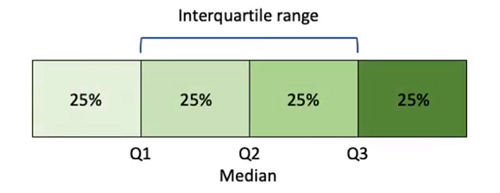

Công thức: IQR = Distance between 1st Quantile (at 25%) and 3rd Quantile (at 75%) = Q3 - Q1

Nếu điểm giá trị bất kỳ của tập dữ liệu, mà nằm ở khoảng cách quá 1.5 lần so với IQR thì tức là Outlier.

In [31]:
# VÍ DỤ:
# Xác định outliers của Rainfall:
IQR = dtset.Rainfall.quantile(0.75) - dtset.Rainfall.quantile(0.25) # Tính IQR theo công thức: IQR = Q3 - Q1
# NẾU giá trị của điểm dữ liệu nhỏ hơn lower_value HOẶC lớn hơn upper_value Thì là Outlier:
lower_value = dtset.Rainfall.quantile(0.25) - (1.5*IQR) # Labeling cho điều kiện nhỏ: Q1 - (1.5*IQR)
upper_value = dtset.Rainfall.quantile(0.75) + (1.5*IQR) # Labeling cho điều kiện lớn: Q3 + (1.5*IQR)
print('{loweredge} > Rainfall outliers > {upperedge}'.format(loweredge="{:.2f}".format(lower_value), upperedge="{:.2f}".format(upper_value)))

# Xác định outliers của Evaporation:
IQR = dtset.Evaporation.quantile(0.75) - dtset.Evaporation.quantile(0.25)
lower_value = dtset.Evaporation.quantile(0.25) - (1.5*IQR)
upper_value = dtset.Evaporation.quantile(0.75) + (1.5*IQR)
print('{loweredge} > Evaporation outliers > {upperedge}'.format(loweredge="{:.2f}".format(lower_value), upperedge="{:.2f}".format(upper_value)))

# Xác định outliers của WindSpeed9am:
IQR = dtset.WindSpeed9am.quantile(0.75) - dtset.WindSpeed9am.quantile(0.25)
lower_value = dtset.WindSpeed9am.quantile(0.25) - (1.5*IQR)
upper_value = dtset.WindSpeed9am.quantile(0.75) + (1.5*IQR)
print('{loweredge} > WindSpeed9am outliers > {upperedge}'.format(loweredge="{:.2f}".format(lower_value), upperedge="{:.2f}".format(upper_value)))

# Xác định outliers của WindSpeed3pm:
IQR = dtset.WindSpeed3pm.quantile(0.75) - dtset.WindSpeed3pm.quantile(0.25)
lower_value = dtset.WindSpeed3pm.quantile(0.25) - (1.5*IQR)
upper_value = dtset.WindSpeed3pm.quantile(0.75) + (1.5*IQR)
print('{loweredge} > WindSpeed3pm outliers > {upperedge}'.format(loweredge="{:.2f}".format(lower_value), upperedge="{:.2f}".format(upper_value)))

# Xác định outliers của WindGustSpeed:
IQR = dtset.WindGustSpeed.quantile(0.75) - dtset.WindGustSpeed.quantile(0.25)
lower_value = dtset.WindGustSpeed.quantile(0.25) - (1.5*IQR)
upper_value = dtset.WindGustSpeed.quantile(0.75) + (1.5*IQR)
print('{loweredge} > WindGustSpeed outliers > {upperedge}'.format(loweredge="{:.2f}".format(lower_value), upperedge="{:.2f}".format(upper_value)))

-0.90 > Rainfall outliers > 1.50
1.90 > Evaporation outliers > 7.50
-11.00 > WindSpeed9am outliers > 37.00
-3.50 > WindSpeed3pm outliers > 40.50
8.50 > WindGustSpeed outliers > 68.50


Chúng ta đã biết rằng các cột Rainfall, Evaporation, WindSpeed9am và WindSpeed3pm có chứa outlier. Áp dụng Univariate method đã nói đến trước đó, chúng ta sẽ xử lý các outlier này để dataset ổn hơn, phục vụ cho quá trình học của mô hình hiệu quả hơn.

In [32]:
for i in dtset:
  if(dtset[i].dtype == 'float64'):
    Q1 = dtset[i].quantile(0.25)
    Q3 = dtset[i].quantile(0.75)
    IQR = Q3 - Q1
    Lower_edge = Q1 - (1.5*IQR)
    Upper_edge = Q3 + (1.5*IQR)
    medi = np.median(dtset[i]) # Tính Trung vị để thay thế cho outlier đó
    for j in dtset[i]:
      if((j>Upper_edge) or (j<Lower_edge)):
        dtset[i] = dtset[i].replace(j, medi)
  else:
    continue

In [33]:
dtset.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

# 8. Áp dụng kỹ thuật Discretization lên các dữ liệu dạng Numeric

Discretization là quá trình mà qua đó chúng ta có thể chuyển đổi các biến dạng liên tục, mô hình hoặc hàm về thành dạng rời rạc (discrete). Điều này được thực hiện bằng cách tạo một tập hợp các khoảng liền nhau (contiguous interval hoặc bin) mà có đi qua phạm vi mà ta mong muốn của biến, mô hình hoặc hàm.

Về sự khác nhau, dữ liệu liên tục được đo (Measured), trong khi dữ liệu rời rạc thì được đếm (Counted).

Bởi dữ liệu liên tục về cơ bản sẽ gây khó khăn cho việc học của mô hình. Chẳng hạn như với sức gió, làm sao để biết gió như thế nào là mạnh? là 20 km/h, 40 km/h hay chỉ 10 km/h? Nếu để chúng riêng lẻ thì chúng ta sẽ có rất nhiều giá trị cần tính toán và làm việc. Nhưng nếu gom về thành các nhóm, chẳng hạn như gió yếu là dưới 10 km/h, trung bình là 25 km/h và mạnh là trên 30 km/h thì sẽ dễ tiếp cận vấn đề hơn rất nhiều. Hơn nữa, một số mô hình như Decision Tree, Random Forest không có khả năng xử lý các dữ liệu liên tục hiệu quả, đòi hỏi phải đưa dữ liệu liên tục về dạng rời rạc. Chưa dừng lại ở đó, việc chuyển liên tục sang rời rạc còn giúp giảm thiểu ảnh hưởng của các nhiễu, nâng cao độ chính xác của mô hình dự đoán sau cùng.

In [34]:
# Áp dụng discretization lên dữ liệu numeric
for col in numerical:
  print(col, end=' ')
  percentiles = list(dtset[col].describe()[3:])
  print(percentiles)
  for b in range(4):
    binn = dtset[col].between(percentiles[b], percentiles[b+1], inclusive='left')
    bin_mean = dtset[binn][col].mean()
    dtset.loc[binn, col] = bin_mean

MinTemp [-6.2, 7.6, 12.0, 16.8, 30.5]
MaxTemp [2.5, 18.0, 22.6, 28.2, 43.6]
Rainfall [0.0, 0.0, 0.0, 0.0, 1.5]
Evaporation [1.9, 4.8, 4.8, 4.8, 7.5]
Sunshine [7.5, 8.5, 8.5, 8.5, 9.4]
WindGustSpeed [9.0, 31.0, 39.0, 44.0, 67.0]
WindSpeed9am [0.0, 7.0, 13.0, 19.0, 37.0]
WindSpeed3pm [0.0, 13.0, 19.0, 24.0, 39.0]
Humidity9am [18.0, 58.0, 70.0, 83.0, 100.0]
Humidity3pm [0.0, 37.0, 52.0, 65.0, 100.0]
Pressure9am [1001.1, 1013.8, 1017.6, 1021.6, 1034.2]
Cloud9am [0.0, 3.0, 5.0, 6.0, 9.0]
Cloud3pm [1.0, 5.0, 5.0, 6.0, 9.0]
Year [2007.0, 2011.0, 2013.0, 2015.0, 2017.0]
Month [1.0, 3.0, 6.0, 9.0, 12.0]
Day [1.0, 8.0, 16.0, 23.0, 31.0]


In [35]:
# Sau khi áp dụng discretization
for col in numerical:
  print(col, dtset[col].unique())

MinTemp [14.2053663   4.05395718  9.78298612 20.46820837 30.5       ]
MaxTemp [25.16056357 32.62556547 20.23266857 14.72300847 43.6       ]
Rainfall [0.0841791 1.5      ]
Evaporation [5.02984555 3.2757704  7.5       ]
Sunshine [8.52091351 7.97267795 9.4       ]
WindGustSpeed [51.59688684 24.78540534 40.09344054 34.0010575  67.        ]
WindSpeed9am [23.58689997  3.10124134  9.05222388 14.71088187 37.        ]
WindSpeed3pm [28.32043197 20.01936952  8.06354545 14.9982195  39.        ]
Humidity9am [ 75.24206391  45.24954254  63.76360197  91.05430784 100.        ]
Humidity3pm [ 24.46856812  77.05073056  44.43954671  57.28844697 100.        ]
Pressure9am [1009.82885077 1018.76817843 1015.69745083 1025.67272753 1034.2       ]
Cloud9am [7.14965648 5.         0.92987217 3.42759362 9.        ]
Cloud3pm [5.         2.07387731 7.08996135 9.        ]
Year [2009.39780867 2011.49864103 2013.5194495  2015.50398687 2017.        ]
Month [12.          1.44890386  4.00050806  6.9825494  10.00335163]
Day 

# 9. Chia Data thành tập X và Y

In [36]:
X = dtset.drop(['RainTomorrow'], axis=1) # Những đặc trưng
Y = dtset['RainTomorrow'] # Nhãn cần dự đoán được

Một Dataset thường có cả đặc trưng dạng category và numeric. Các đặc trưng dạng category có thể dễ hiểu với con người, nhưng máy thì không. Do đó, dữ liệu phải được chuyển đổi về thành dữ liệu dạng numeric để dễ xử lý. Ở đây, chúng ta sẽ làm việc đó thông qua phương pháp Dummy Variable Encoding. Phương pháp này dùng hàm pandas.get_dummies để chuyển dữ liệu chuỗi thành dữ liệu số.



In [37]:
# Các cột thuộc tính có dạng Category:
categoryOnly(dtset).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

Như đã nói ở đầu bài code này, Dataset ban đầu có 7 cột thuộc tính có dạng category. Sau khi xử lý dữ liệu để dành cho mô hình học thì chỉ còn lại 5 cái dùng được là: Location, WindGustDir, WindDir9am, WindDir3pm và RainToday. Vì vậy, bây giờ chúng ta sẽ lần lượt chuyển những đặc trưng này về dạng numeric.

In [38]:
# Chuyển đổi Y (Yes hoặc No) sang dạng numeric (0 hoặc 1)
Y_dumies = pd.get_dummies(Y, drop_first=True)

In [39]:
!pip install category_encoders

In [40]:
X.columns # Trước khi Encoding

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [41]:
# Thực hiện Binary Encoding:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['RainToday'])
X_coded = encoder.fit_transform(X)
X_coded.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday_0,RainToday_1,Year,Month,Day
0,Albury,14.205366,25.160564,0.084179,5.029846,8.520914,W,51.596887,W,WNW,...,75.242064,24.468568,1009.828851,7.149656,5.000000,0,1,2009.397809,12.0,3.998657
1,Albury,4.053957,25.160564,0.084179,5.029846,8.520914,WNW,51.596887,NNW,WSW,...,45.249543,24.468568,1009.828851,5.000000,5.000000,0,1,2009.397809,12.0,3.998657
2,Albury,14.205366,25.160564,0.084179,5.029846,8.520914,WSW,51.596887,W,WSW,...,45.249543,24.468568,1009.828851,5.000000,2.073877,0,1,2009.397809,12.0,3.998657
3,Albury,9.782986,25.160564,0.084179,5.029846,8.520914,NE,24.785405,SE,E,...,45.249543,24.468568,1018.768178,5.000000,5.000000,0,1,2009.397809,12.0,3.998657
4,Albury,20.468208,32.625565,0.084179,5.029846,8.520914,W,40.093441,ENE,NW,...,75.242064,24.468568,1009.828851,7.149656,7.089961,0,1,2009.397809,12.0,3.998657


In [42]:
X_coded.columns # Sau khi Binary Encoding

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday_0', 'RainToday_1',
       'Year', 'Month', 'Day'],
      dtype='object')

In [43]:
# Enconding các đặc trưng dạng Category còn lại:
X_conc = pd.get_dummies(X_coded)
X_conc.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,14.205366,25.160564,0.084179,5.029846,8.520914,51.596887,23.586900,28.320432,75.242064,24.468568,...,0,0,0,0,0,0,0,0,1,0
1,4.053957,25.160564,0.084179,5.029846,8.520914,51.596887,3.101241,20.019370,45.249543,24.468568,...,0,0,0,0,0,0,0,0,0,1
2,14.205366,25.160564,0.084179,5.029846,8.520914,51.596887,23.586900,28.320432,45.249543,24.468568,...,0,0,0,0,0,0,0,0,0,1
3,9.782986,25.160564,0.084179,5.029846,8.520914,24.785405,9.052224,8.063545,45.249543,24.468568,...,0,0,0,0,0,0,0,0,0,0
4,20.468208,32.625565,0.084179,5.029846,8.520914,40.093441,9.052224,20.019370,75.242064,24.468568,...,0,1,0,0,0,0,0,0,0,0


In [44]:
X_conc.columns[15:] # Sau khi Encoding hoàn tất

Index(['Year', 'Month', 'Day', 'Location_Adelaide', 'Location_Albany',
       'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek',
       'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane',
       'Location_Cairns', 'Location_Canberra', 'Location_Cobar',
       'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin',
       'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine',
       'Location_Launceston', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle',
       'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland',
       'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Richmond', 'Location_Sale', 'Location_SalmonGums',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Locati

Các thuật toán tính toán khoảng cách giữa các đặc trưng (Feature) có xu hướng thiên vị các biến kiểu numeric có giá trị lớn hơn nếu dữ liệu chưa từng được scale. Do đó, việc thực hiện Feature Scaling trước khi đưa vào sẽ giúp quá trình học của mô hình diễn ra thuận lợi và có tính hiệu quả cao hơn. Từ đó gia tăng độ chính xác của dự đoán mà mô hình đưa ra. Feature scaling có 2 kỹ thuật nổi tiếng. Trong đó, khác với Normalization nhạy cảm với outlier, Standardization được sử dụng trong bài này ít bị ảnh hưởng bởi outlier do nó không có phạm vi được xác định trước để áp đặt ràng buộc lên đặc trưng trải qua biến đổi.

In [45]:
# Standardization Feature Scaling:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_conc)
X_scaled = pd.DataFrame(X_scaled, columns=[X_conc.columns])
X_scaled.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.335317,0.290802,-0.009923,0.490662,0.140458,1.310791,1.306452,1.347282,0.341986,-1.399621,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,3.927735,-0.264980
1,-1.354598,0.290802,-0.009923,0.490662,0.140458,1.310791,-1.376060,0.243723,-1.422779,-1.399621,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,3.773863
2,0.335317,0.290802,-0.009923,0.490662,0.140458,1.310791,1.306452,1.347282,-1.422779,-1.399621,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,3.773863
3,-0.400881,0.290802,-0.009923,0.490662,0.140458,-1.371263,-0.596804,-1.345707,-1.422779,-1.399621,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,-0.264980
4,1.377898,1.424511,-0.009923,0.490662,0.140458,0.160058,-0.596804,0.243723,0.341986,-1.399621,...,-0.239816,3.973890,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,-0.264980


In [46]:
# Chia dữ liệu thành các tập để train và để test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_dumies, test_size=0.25, random_state=0)
pd.DataFrame(X_train).head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
12826,-0.400881,-0.457598,-0.009923,-2.034344,0.140458,0.160058,1.306452,-1.345707,0.341986,0.299979,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.2546,-0.26498
32391,0.335317,0.290802,-0.009923,0.490662,0.140458,-1.371263,0.144174,-0.423798,-0.333408,0.299979,...,-0.239816,-0.251643,-0.269046,2.974303,-0.262127,-0.244325,-0.262739,-0.273721,-0.2546,-0.26498
185,-1.354598,-1.294350,-0.009923,0.490662,0.140458,-1.371263,-1.376060,-1.345707,1.272381,0.299979,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,3.653353,-0.2546,-0.26498
36029,-1.354598,-1.294350,-0.009923,0.490662,-4.060913,-0.449386,0.144174,-0.423798,0.341986,0.299979,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.2546,-0.26498
14020,-0.400881,-1.294350,-0.009923,0.490662,0.140458,1.310791,-0.596804,1.347282,1.272381,0.299979,...,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,3.806056,-0.273721,-0.2546,-0.26498


# 10. Học máy

In [47]:
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

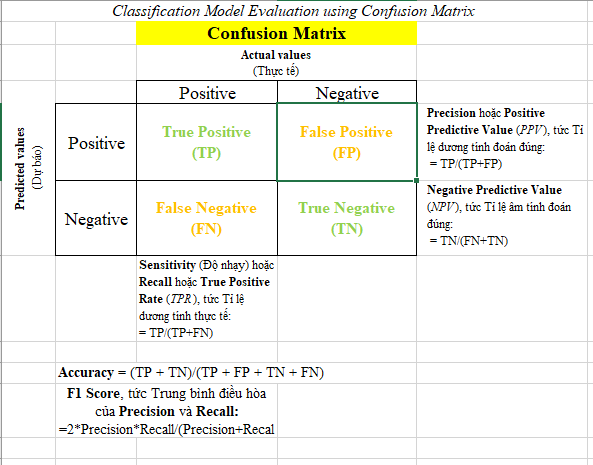

## Hàm sử dụng chung

In [48]:
# Hàm tổng quát
def all_inOne(model, X_train, y_train, X_test, y_test, verbose=True):
  t0 = time.time()
  if verbose == False:
    model.fit(X_train, y_train, verbose=0)
  else:
    model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  # roc_auc = roc_auc_score(y_test, y_pred) 
  timeTaken = time.time() - t0
  conMatrix = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, digits=5))
  print(f'Training set score: {round(model.score(X_train, y_train) * 100, 2)}%')
  print ('---')
  print("Accuracy = {}%".format(round(accuracy*100, 2)))
  print ('---')
  # print("ROC Area under Curve = {}".format(roc_auc))
  # print ('---')
  print("Time taken = {}".format(timeTaken))
  print ('---')
  print ('Confusion Matrix\n\n', conMatrix)
  print ('---')
  # probs = model.predict_proba(X_test)  
  # probs = probs[:, 1]  
  # fper, tper, thresholds = roc_curve(y_test, probs) 
  # ROC_Plotted(fper, tper)
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize = 'all')
  return model, accuracy, precision, recall, f1, timeTaken

## Mô hình thứ nhất - Naïve Bayes

              precision    recall  f1-score   support

           0    0.87027   0.87267   0.87147     27543
           1    0.55776   0.55246   0.55510      8006

    accuracy                        0.80056     35549
   macro avg    0.71401   0.71257   0.71328     35549
weighted avg    0.79989   0.80056   0.80022     35549

Training set score: 80.05%
---
Accuracy = 80.06%
---
Time taken = 0.26578402519226074
---
Confusion Matrix

 [[24036  3507]
 [ 3583  4423]]
---


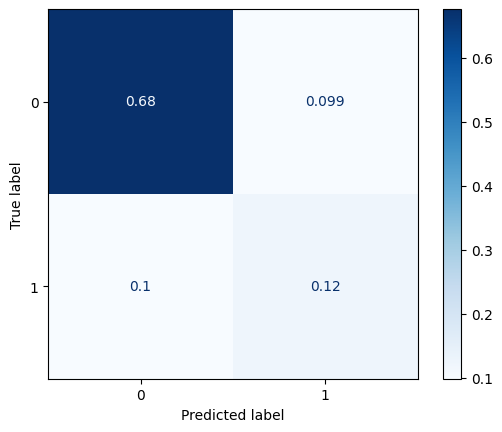

In [49]:
# Áp dụng Naïve Bayes model:
params_dt = {'alpha': 0.1, 'binarize': "6.0", 'fit_prior':True}

NBClassifier = BernoulliNB(alpha=1, binarize=1, fit_prior=True)
NB, NB_accuracy, NB_precision, NB_recall, NB_f1, NB_timeTaken = all_inOne(NBClassifier, X_train, y_train, X_test, y_test)

## Mô hình thứ hai - KNN

              precision    recall  f1-score   support

           0    0.83063   0.92641   0.87591     27543
           1    0.58033   0.35011   0.43674      8006

    accuracy                        0.79662     35549
   macro avg    0.70548   0.63826   0.65632     35549
weighted avg    0.77426   0.79662   0.77700     35549

Training set score: 84.92%
---
Accuracy = 79.66%
---
Time taken = 9.501886367797852
---
Confusion Matrix

 [[25516  2027]
 [ 5203  2803]]
---


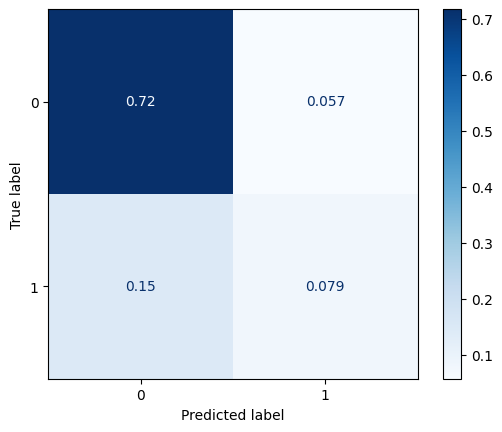

In [50]:
# Áp dụng KNN model:
knnClassifier = KNeighborsClassifier()
knn, knn_accuracy, knn_precision, knn_recall, knn_f1, knn_timeTaken = all_inOne(knnClassifier, X_train, y_train, X_test, y_test)

## Mô hình thứ ba - Decision Tree

              precision    recall  f1-score   support

           0    0.84996   0.90952   0.87874     27543
           1    0.58986   0.44766   0.50902      8006

    accuracy                        0.80551     35549
   macro avg    0.71991   0.67859   0.69388     35549
weighted avg    0.79139   0.80551   0.79547     35549

Training set score: 88.12%
---
Accuracy = 80.55%
---
Time taken = 0.35169100761413574
---
Confusion Matrix

 [[25051  2492]
 [ 4422  3584]]
---


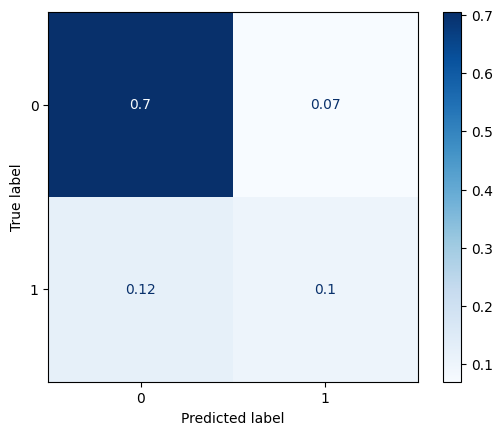

In [51]:
# Áp dụng Decision Tree model:
params_dt = {'max_depth': 20, 'max_features': "sqrt", 'splitter':'best', 'max_leaf_nodes':None}
DecisionTreeClassifier = DecisionTreeClassifier(**params_dt)
DecisionTree, DecisionTree_accuracy, DecisionTree_precision, DecisionTree_recall, DecisionTree_f1, DecisionTree_timeTaken = all_inOne(DecisionTreeClassifier, X_train, y_train, X_test, y_test)

## Mô hình thứ tư - Random Forest

              precision    recall  f1-score   support

           0    0.84971   0.95719   0.90026     27543
           1    0.73927   0.41756   0.53368      8006

    accuracy                        0.83566     35549
   macro avg    0.79449   0.68738   0.71697     35549
weighted avg    0.82484   0.83566   0.81770     35549

Training set score: 86.89%
---
Accuracy = 83.57%
---
Time taken = 32.68571162223816
---
Confusion Matrix

 [[26364  1179]
 [ 4663  3343]]
---


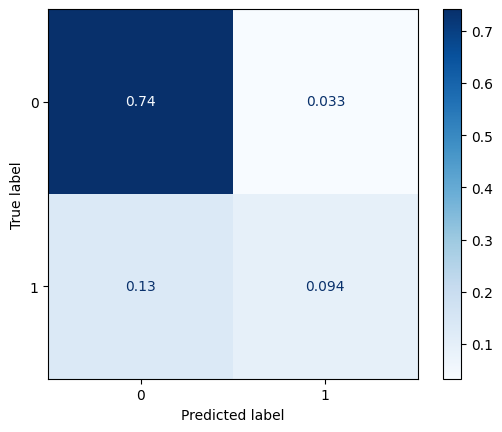

In [52]:
# Áp dụng Decision Tree model:
params_rf = {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 12345}
RFClassifier = RandomForestClassifier(**params_rf)
RF, RF_accuracy, RF_precision, RF_recall, RF_f1, RF_timeTaken = all_inOne(RFClassifier, X_train, y_train, X_test, y_test)

## So sánh giữa các mô hình

In [53]:
modelList = ['Naive Bayes', 'KNN', 'Decision Tree','Random Forest']
accuracyList = [NB_accuracy, knn_accuracy, DecisionTree_accuracy, RF_accuracy]
precisionList = [NB_precision, knn_precision, DecisionTree_precision, RF_precision]
recallList = [NB_recall, knn_recall, DecisionTree_recall, RF_recall]
f1List = [NB_f1, knn_f1, DecisionTree_f1, RF_f1]
timeTakenList = [NB_timeTaken, knn_timeTaken, DecisionTree_timeTaken, RF_timeTaken]

model_data = {'Model': modelList,
              'Accuracy': accuracyList,
              'Precision': precisionList,
              'Recall': recallList,
              'F1': f1List,
              'Time taken': timeTakenList}
data = pd.DataFrame(model_data)

<AxesSubplot: xlabel='Model'>

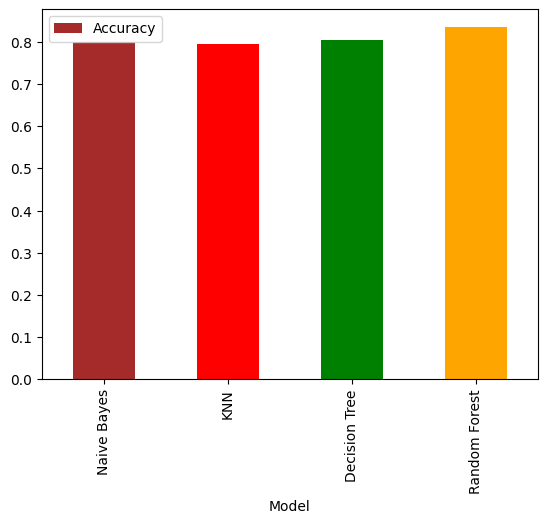

In [54]:
data.plot.bar('Model', 'Accuracy', color=['brown', 'red', 'green', 'orange'])

<AxesSubplot: xlabel='Model'>

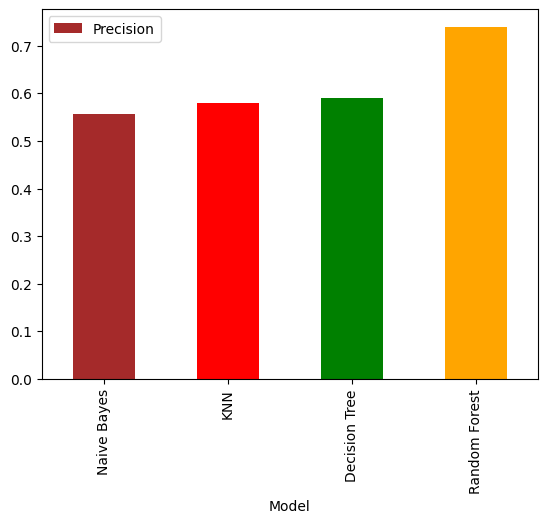

In [55]:
data.plot.bar('Model', 'Precision', color=['brown', 'red', 'green', 'orange'])

<AxesSubplot: xlabel='Model'>

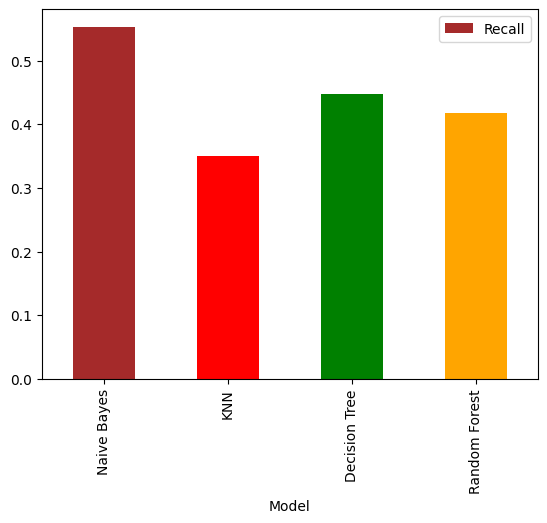

In [56]:
data.plot.bar('Model', 'Recall', color=['brown', 'red', 'green', 'orange'])

<AxesSubplot: xlabel='Model'>

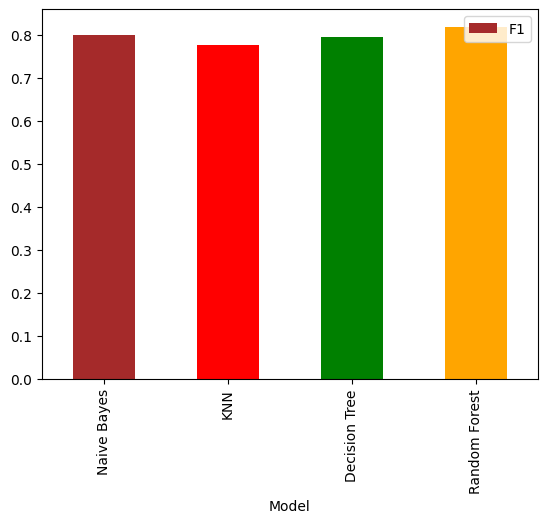

In [57]:
data.plot.bar('Model', 'F1', color=['brown', 'red', 'green', 'orange'])

<AxesSubplot: xlabel='Model'>

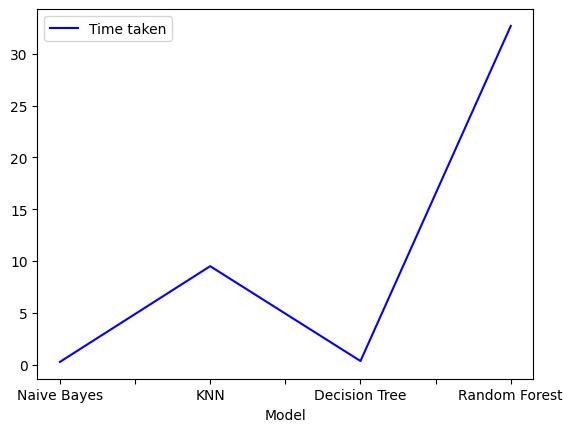

In [58]:
data.plot.line('Model', 'Time taken', color='blue')